len(dfs): 3


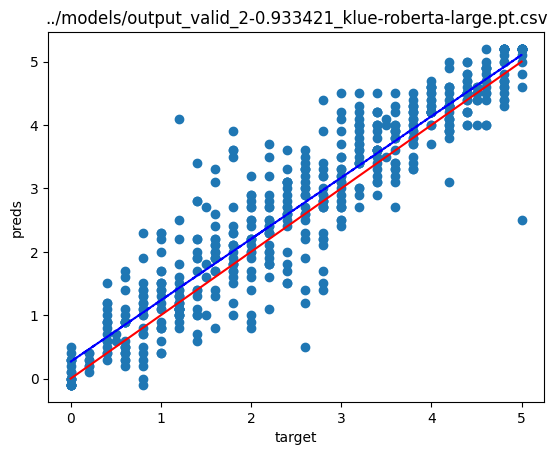

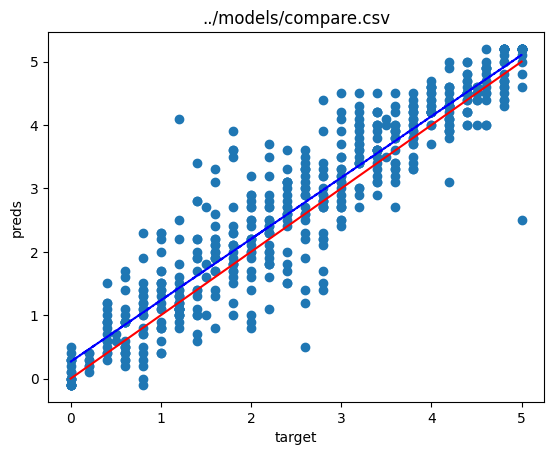

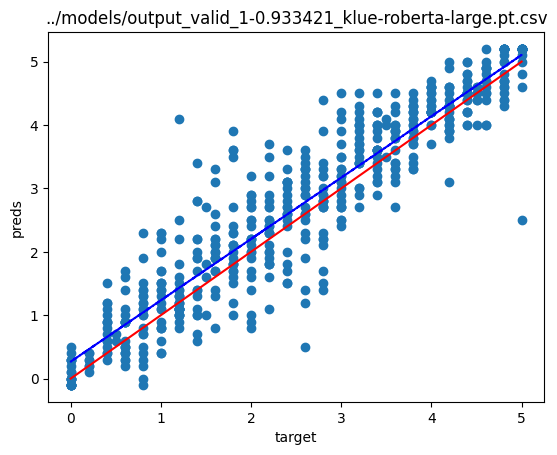

corr: 0.9338504776960503
corr: 0.9338504776960503
corr: 0.9338504776960503


In [21]:
# subfolder 파일 리스트의 하위 파일에 있는 output_valid-{subfolder}.csv 파일을 df로 load
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


valid = pd.read_csv('../../data/dev_preprop_v2.csv')

folder = '../models'
# find csv files in folder
dfs = []
files = [f.path for f in os.scandir(folder) if f.is_file() and f.path.endswith('.csv')]
for file in files:
    if f'output_valid' in file:
        df = pd.read_csv(file)
        dfs.append(df)

print(f'len(dfs): {len(dfs)}')

valids = []
for df in dfs:
    valid['preds'] = df['target']
    valids.append(valid)

# draw scatter plot
for i, valid in enumerate(valids):
    plt.scatter(valid['label'], valid['preds'])
    plt.xlabel('target')
    plt.ylabel('preds')
    plt.plot([0, 5], [0, 5], color='red')
    # draw regression line
    z = np.polyfit(valid['label'], valid['preds'], 1)
    p = np.poly1d(z)
    plt.plot(valid['label'],p(valid['label']),"b--")
    plt.title(f'{files[i]}')
    plt.show()
    
# calculate pearson correlation with library
for i, valid in enumerate(valids):
    corr = valid['label'].corr(valid['preds'])
    print(f'corr: {corr}')

In [23]:
test_1 = pd.read_csv(files[2])
test_2 = pd.read_csv(files[0])
test_1.describe()

,target
count,550.000000
mean,2.767455
std,1.512153
min,-0.100000
25%,1.400000
50%,2.900000
75%,4.100000
max,5.200000


In [25]:
test_2.describe()

,target
count,550.000000
mean,2.758545
std,1.490868
min,0.000000
25%,1.400000
50%,2.800000
75%,4.200000
max,5.000000


/tmp/ipykernel_1240542/3700123460.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mae_by_category = data.groupby('category')['abs_error'].mean()


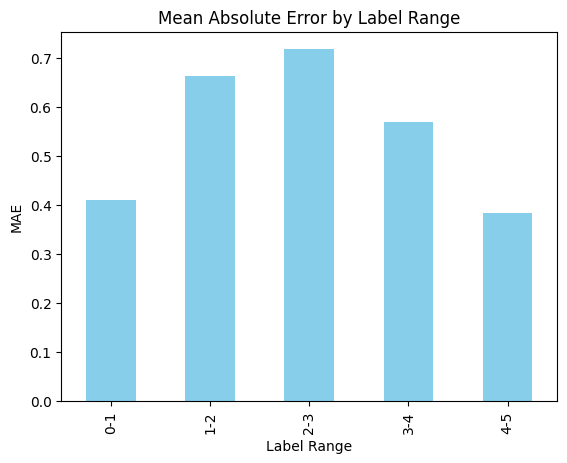

/tmp/ipykernel_1240542/3700123460.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mae_by_category = data.groupby('category')['abs_error'].mean()


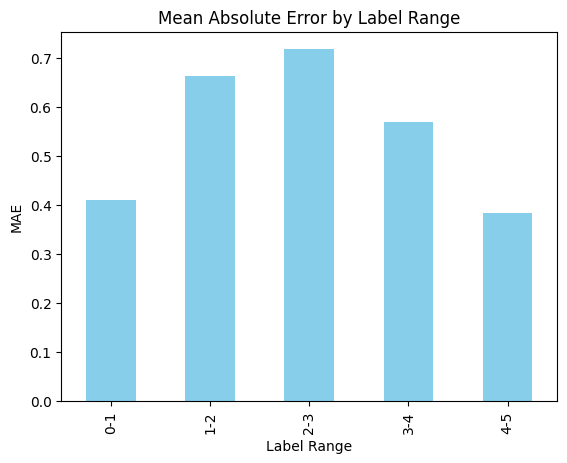

/tmp/ipykernel_1240542/3700123460.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mae_by_category = data.groupby('category')['abs_error'].mean()


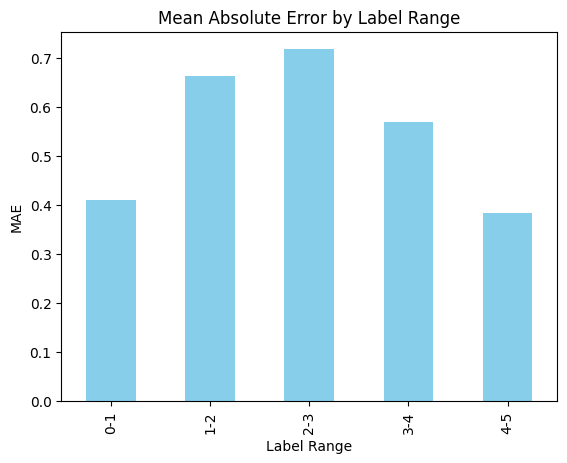

/tmp/ipykernel_1240542/3700123460.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mae_by_category = data.groupby('category')['abs_error'].mean()


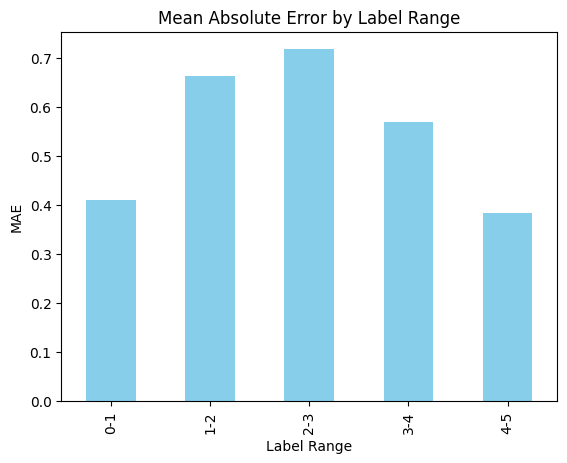

/tmp/ipykernel_1240542/3700123460.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mae_by_category = data.groupby('category')['abs_error'].mean()


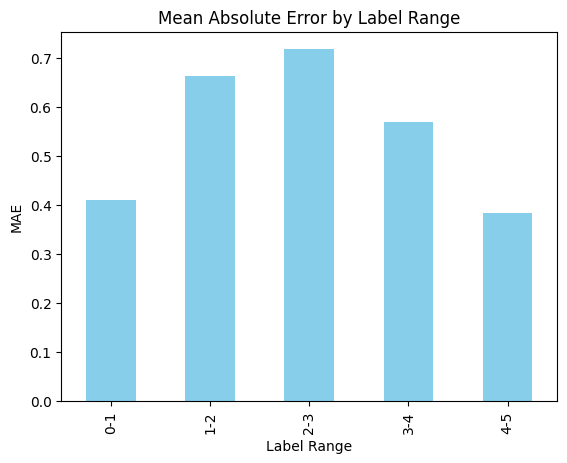

/tmp/ipykernel_1240542/3700123460.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mae_by_category = data.groupby('category')['abs_error'].mean()


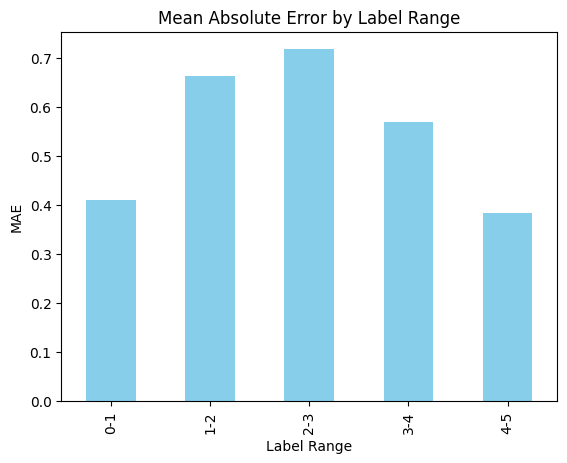

In [2]:
# 구간 별 MAE 계산
'''
# 실제 값과 예측 값을 예시로 설정
y_true = np.array([4.5, 3.2, 2.7, 1.1, 0.8, 3.9, 4.8, 1.0, 2.5, 3.6])
y_pred = np.array([4.3, 3.0, 2.9, 1.3, 1.0, 4.1, 4.5, 0.9, 2.8, 3.5])

# 구간을 설정 (0.0 ~ 5.0 사이를 5개 구간으로 나눔)
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']

# 각 데이터의 실제 값에 대해 구간을 할당
categories = pd.cut(y_true, bins=bins, labels=labels, include_lowest=True)

# 구간별로 실제 값과 예측값의 차이(절대 오차) 계산
data = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred, 'category': categories})
data['abs_error'] = abs(data['y_true'] - data['y_pred'])

# 구간별 평균 절대 오차(MAE) 계산
mae_by_category = data.groupby('category')['abs_error'].mean()
print(mae_by_category)

# 구간별로 예측 성능을 시각화 (optional)
import matplotlib.pyplot as plt

mae_by_category.plot(kind='bar', color='skyblue')
plt.title('Mean Absolute Error by Label Range')
plt.ylabel('MAE')
plt.xlabel('Label Range')
plt.show()
'''


for i, valid in enumerate(valids):
    bins = [0, 1, 2, 3, 4, 5]
    labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
    categories = pd.cut(valid['label'], bins=bins, labels=labels, include_lowest=True)
    data = pd.DataFrame({'y_true': valid['label'], 'y_pred': valid['preds'], 'category': categories})
    data['abs_error'] = abs(data['y_true'] - data['y_pred'])
    mae_by_category = data.groupby('category')['abs_error'].mean()
    mae_by_category.plot(kind='bar', color='skyblue')
    plt.title('Mean Absolute Error by Label Range')
    plt.ylabel('MAE')
    plt.xlabel('Label Range')
    plt.show()    

/tmp/ipykernel_1240542/491260178.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  r2_by_category = data.groupby('category').apply(lambda df: r2_score(df['y_true'], df['y_pred']))


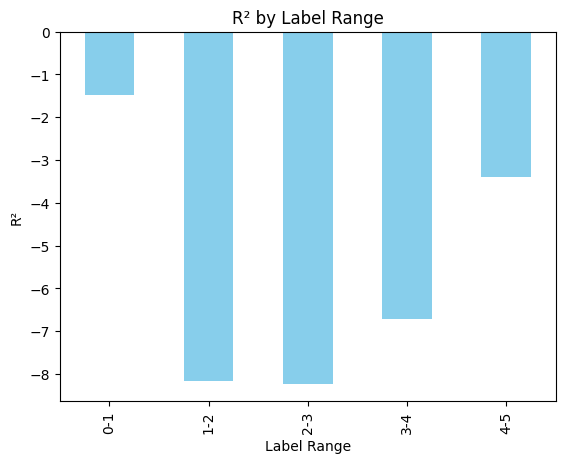

/tmp/ipykernel_1240542/491260178.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  r2_by_category = data.groupby('category').apply(lambda df: r2_score(df['y_true'], df['y_pred']))


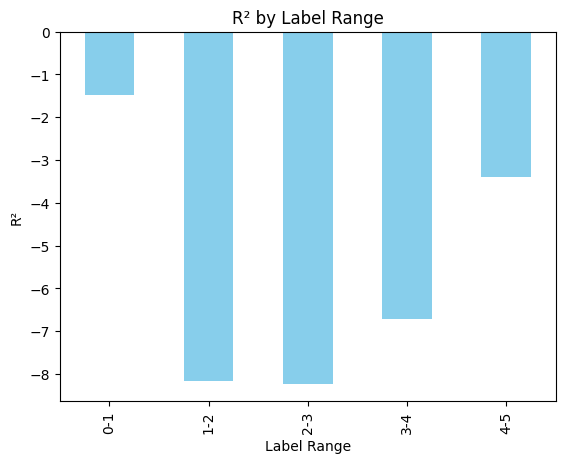

/tmp/ipykernel_1240542/491260178.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  r2_by_category = data.groupby('category').apply(lambda df: r2_score(df['y_true'], df['y_pred']))


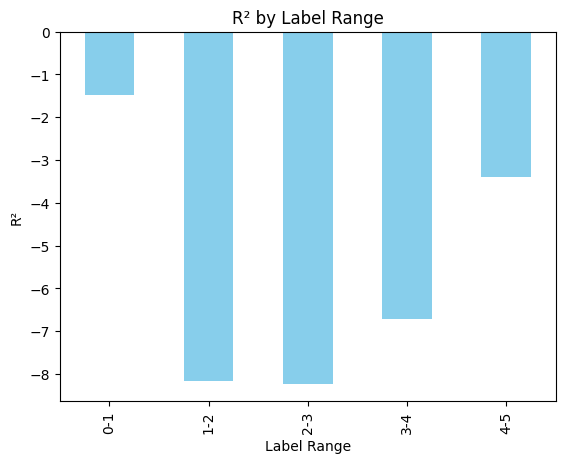

/tmp/ipykernel_1240542/491260178.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  r2_by_category = data.groupby('category').apply(lambda df: r2_score(df['y_true'], df['y_pred']))


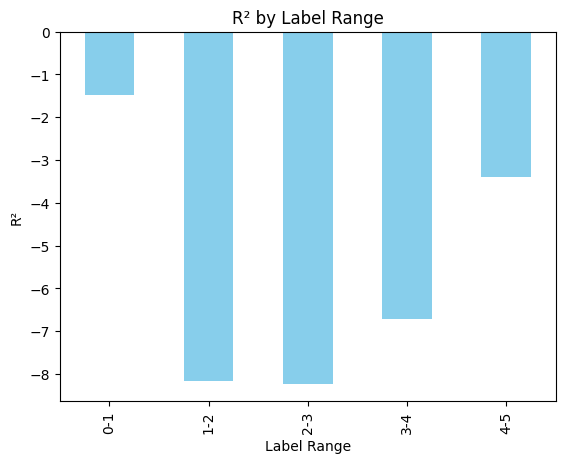

/tmp/ipykernel_1240542/491260178.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  r2_by_category = data.groupby('category').apply(lambda df: r2_score(df['y_true'], df['y_pred']))


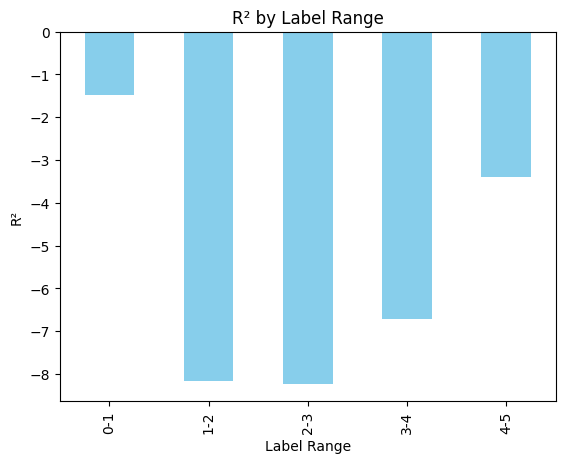

/tmp/ipykernel_1240542/491260178.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  r2_by_category = data.groupby('category').apply(lambda df: r2_score(df['y_true'], df['y_pred']))


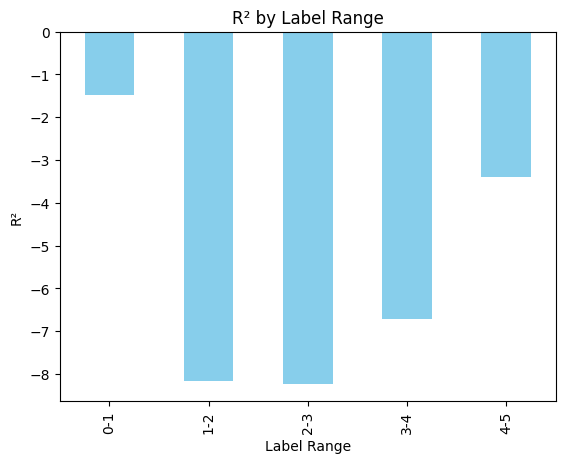

In [3]:
from sklearn.metrics import r2_score

# 구간 별 R2 계산
for i, valid in enumerate(valids):
    bins = [0, 1, 2, 3, 4, 5]
    labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
    categories = pd.cut(valid['label'], bins=bins, labels=labels, include_lowest=True)
    data = pd.DataFrame({'y_true': valid['label'], 'y_pred': valid['preds'], 'category': categories})
    r2_by_category = data.groupby('category').apply(lambda df: r2_score(df['y_true'], df['y_pred']))
    r2_by_category.plot(kind='bar', color='skyblue')
    plt.title('R² by Label Range')
    plt.ylabel('R²')
    plt.xlabel('Label Range')
    plt.show()

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 구간 별 confusion matrix 계산
for i, valid in enumerate(valids):
    bins = [0, 1, 2, 3, 4, 5]
    labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
    y_true_binned = pd.cut(valid['label'], bins=bins, labels=labels, include_lowest=True)
    y_pred_binned = pd.cut(valid['preds'], bins=bins, labels=labels, include_lowest=True)
    cm = confusion_matrix(y_true_binned, y_pred_binned, labels=labels)
    print("Confusion Matrix:\n", cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Predicted vs Actual')
    plt.show()

TypeError: '<' not supported between instances of 'str' and 'float'